In [38]:
import numpy as np
import matplotlib.pyplot as plt

import interfere

plt.rcParams["figure.dpi"] = 300
rng = np.random.default_rng(11)

COLORS = ["darkblue", "orange", "red", "darkgreen", "purple"]

# Dynamic Models and Intervention Extrapolation

This notebook explores the ability of system identification methods to extrapolate about never before
seen interventions.


# Evalutation

Since mean squared error is out of the question for this problem, we evaluate
the methods directionally. That is, do they predict the correct directional
change of each non intervened signal in response to the intervention relative to
the counterfactual, non-intervened system.

For example, if a system has three variables, $x(t)$, $y(t)$ and $z(t)$ and we intervene
on $x(t)$ to produce $y_\text{do}(t)$ and $z_\text{do}(t)$, we evaluate the
method's ability to estimate the sign of the difference in the time average of
the signals. E.g.
$$
\frac{1}{T}\int_0^T  y_\text{do}(t) dt - \frac{1}{T}\int_0^T y(t)dt 
$$

In [39]:
def accuracy(X, X_do, pred_X_do, intervention_idx):

    # Drop intervention column
    X_resp = np.delete(X, intervention_idx, axis=1)
    X_do_resp = np.delete(X_do, intervention_idx, axis=1)
    pred_X_do_resp = np.delete(pred_X_do, intervention_idx, axis=1)

    # Compute time average
    X_avg = np.mean(X_resp, axis=0)
    X_do_avg = np.mean(X_do_resp, axis=0)
    pred_X_do_avg = np.mean(pred_X_do_resp, axis=0)

    # Compute sign of the difference
    sign_of_true_diff = (X_do_avg - X_avg) > 0
    sign_of_pred_diff = (pred_X_do_avg - X_avg) > 0

    # Return number of signals correct
    acc = np.mean(sign_of_true_diff == sign_of_pred_diff)
    return acc

## Linear

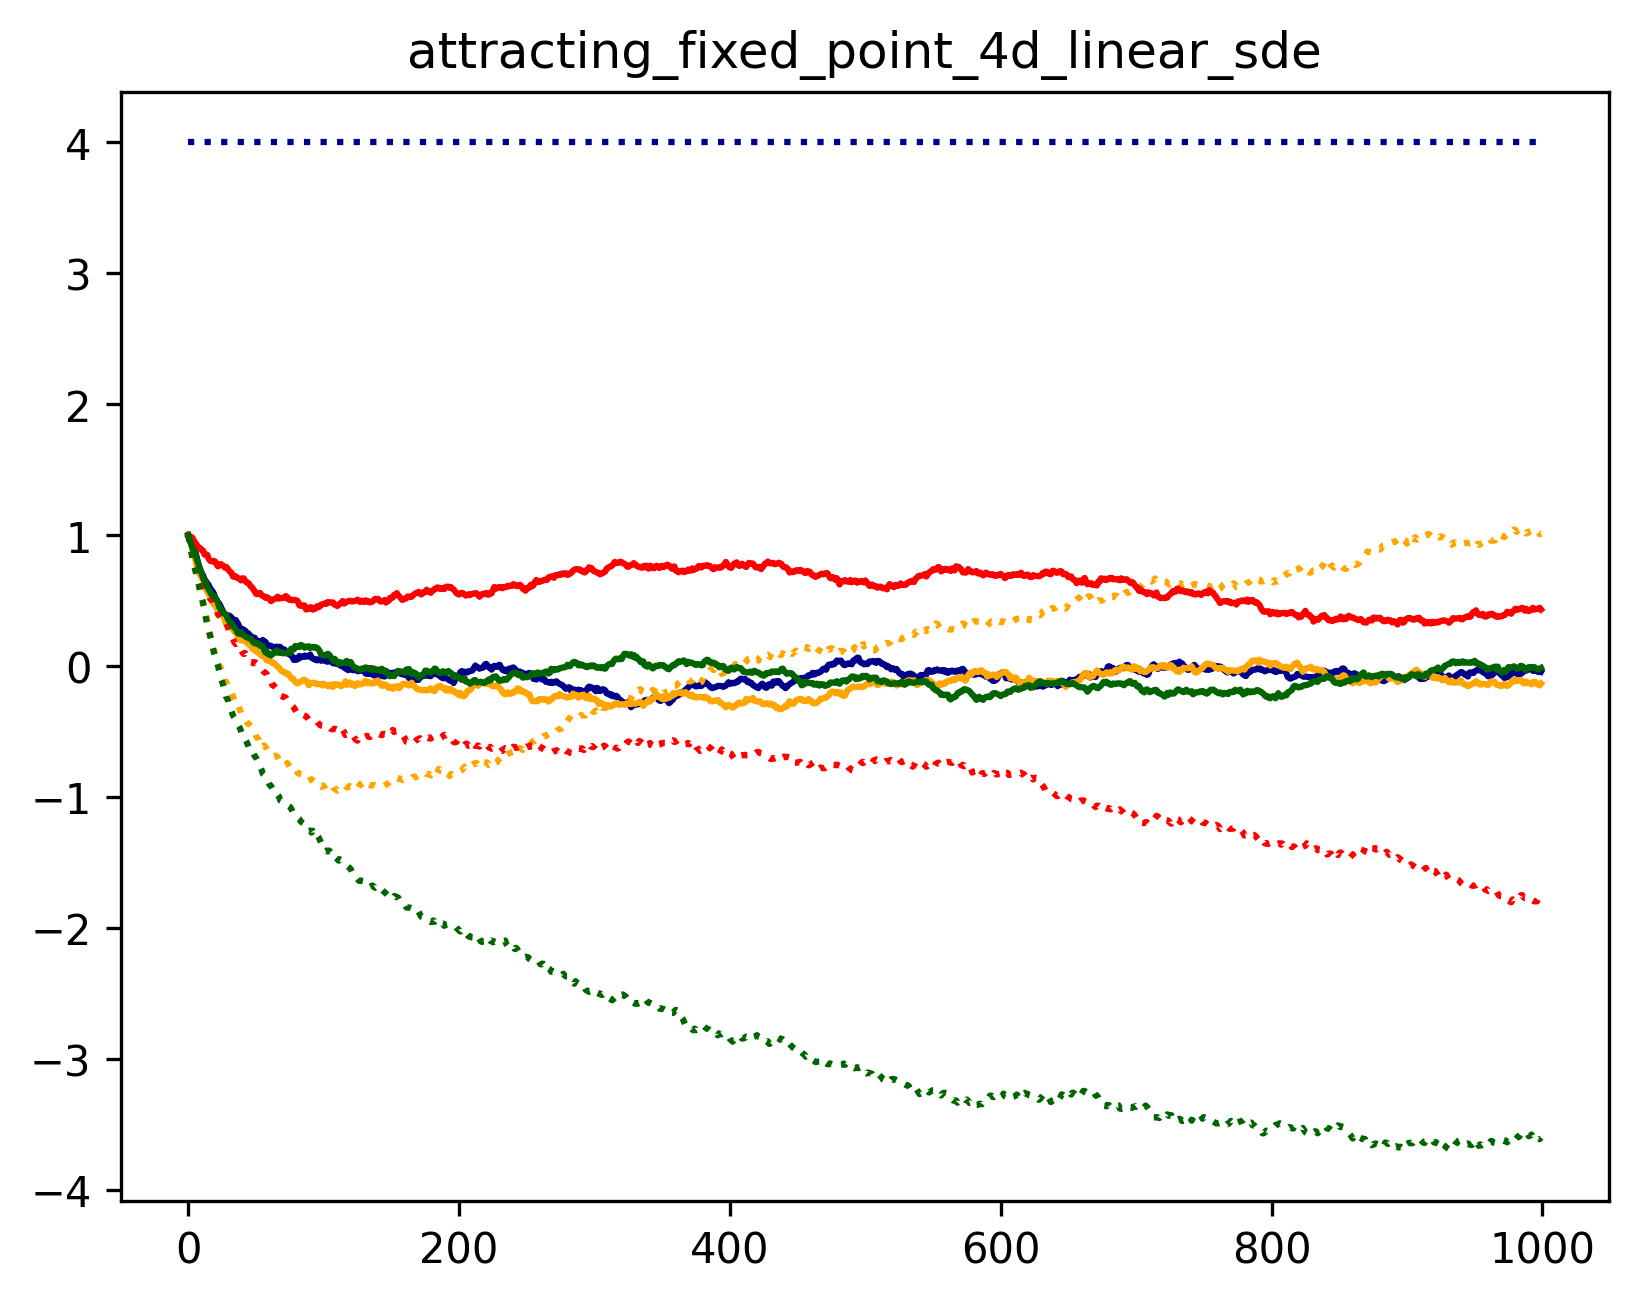

In [40]:
kwargs = dict(
    model_type=interfere.dynamics.attracting_fixed_point_4d_linear_sde,
    model_params={"sigma": 0.1},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[np.ones(4)],
    time_points_iter=[np.linspace(0, 10, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng,
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  1.0
SINDy accuracy:  0.6666666666666666


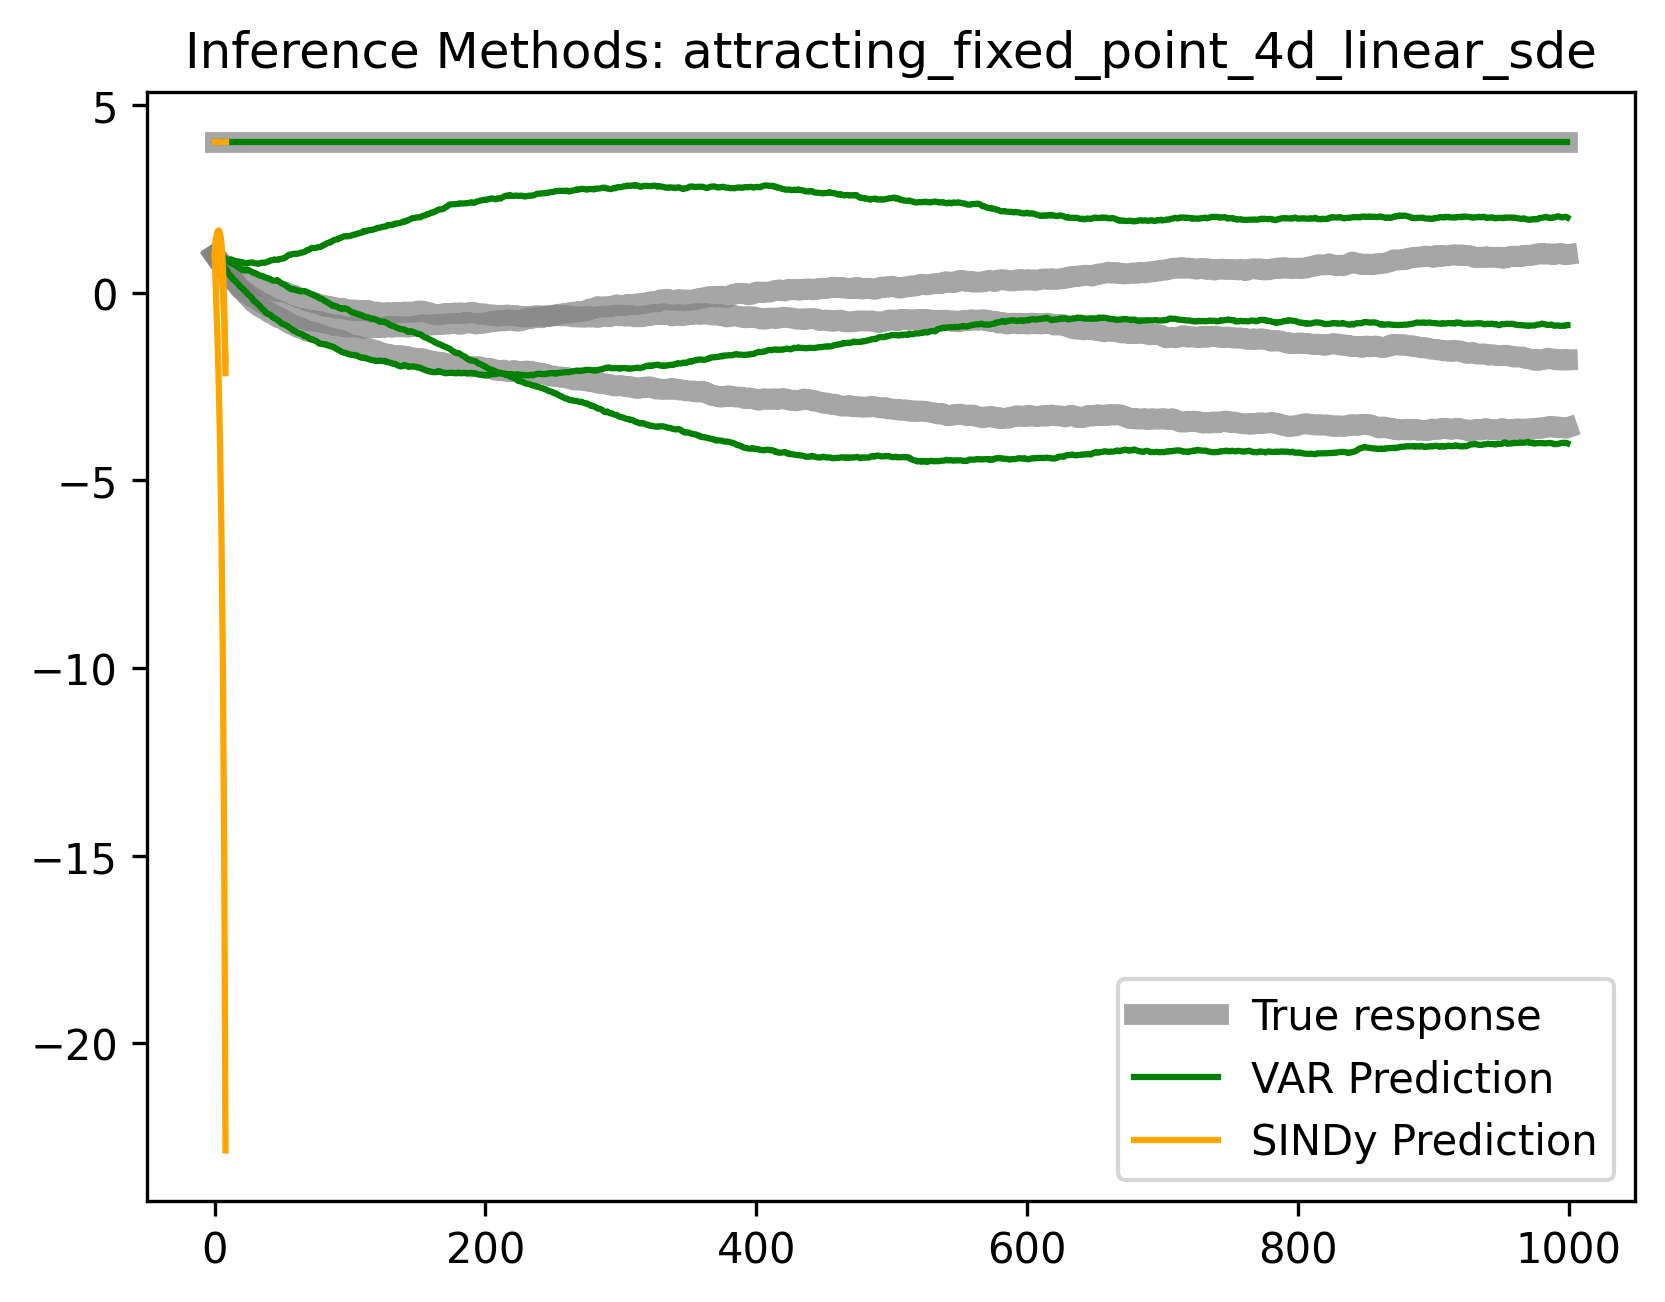

In [41]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

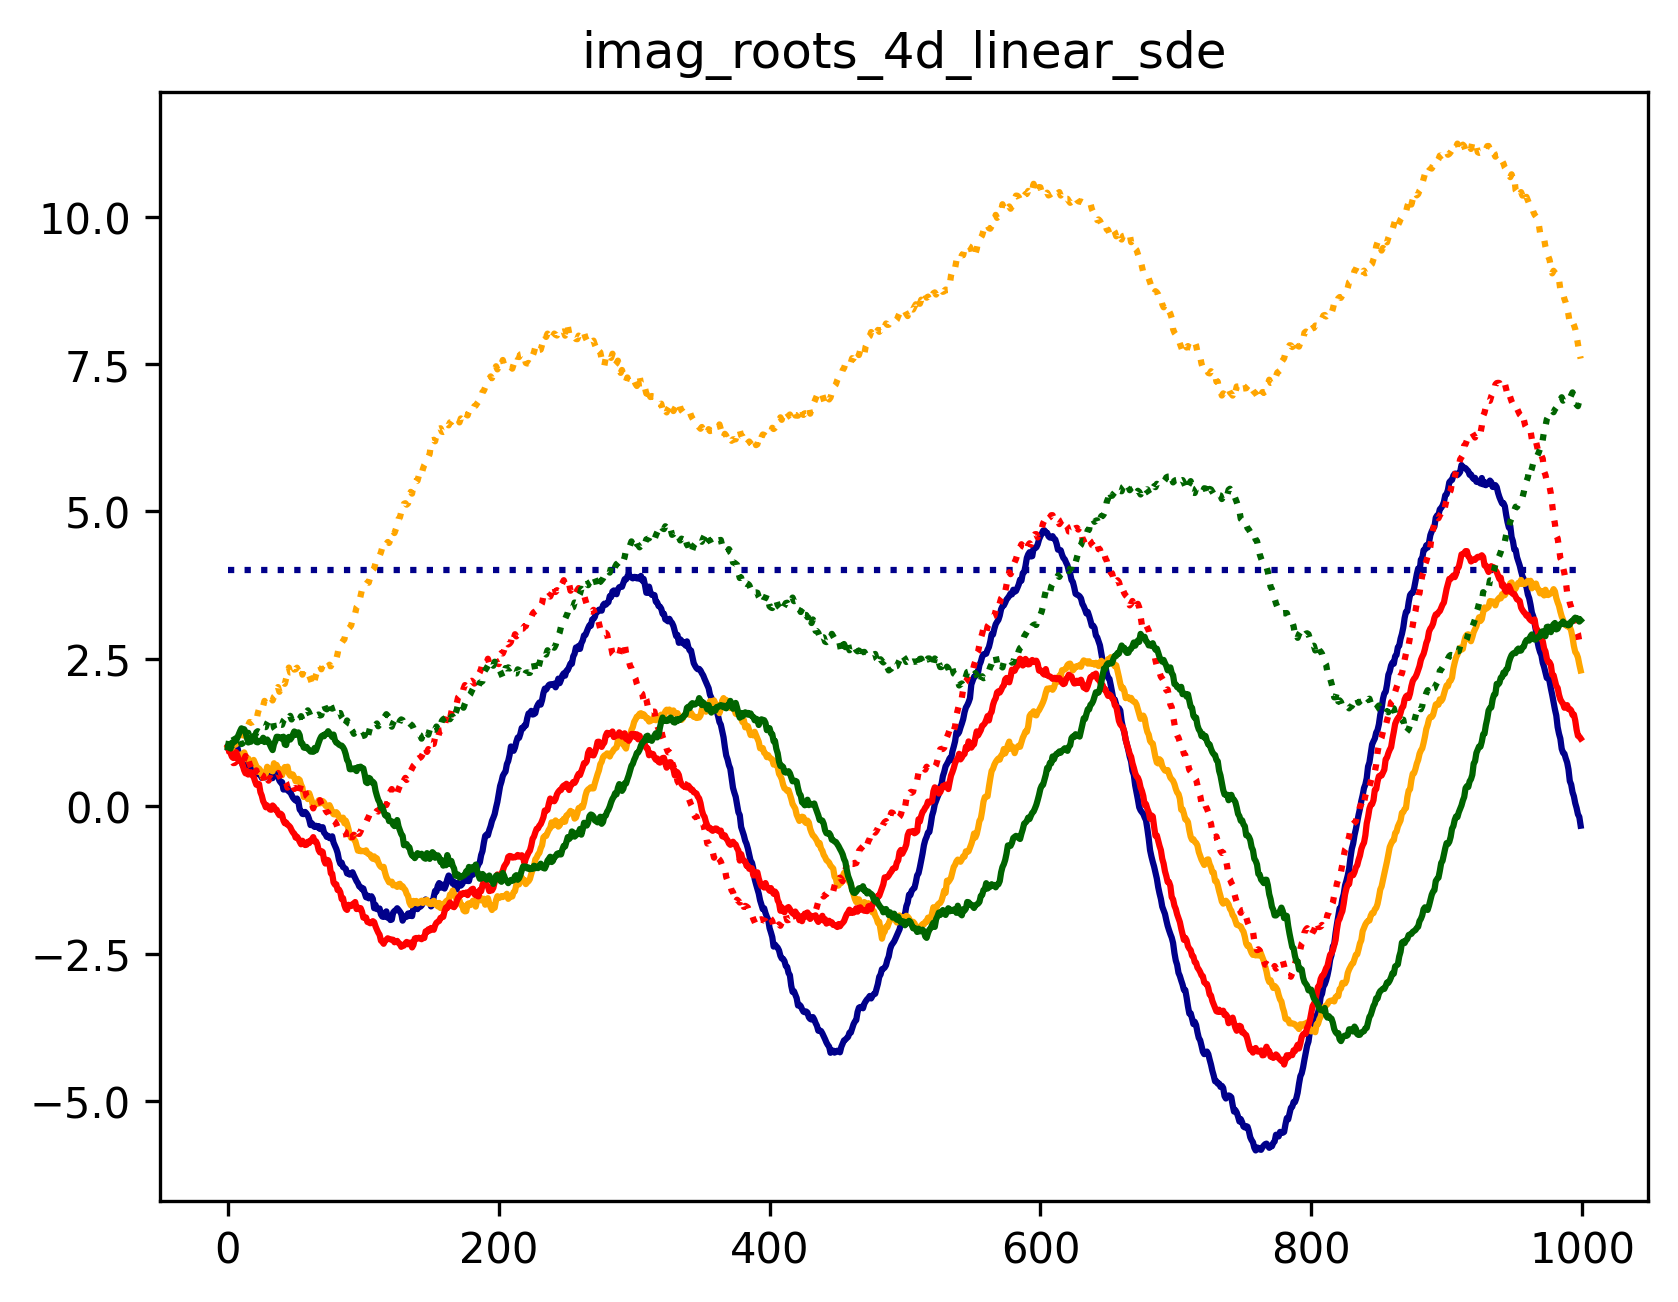

In [42]:
kwargs = dict(
    model_type=interfere.dynamics.imag_roots_4d_linear_sde,
    model_params={"sigma": 0.5},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[np.ones(4)],
    time_points_iter=[np.linspace(0, 10, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



#### Predictions

VAR accuracy:  0.6666666666666666
SINDy accuracy:  0.3333333333333333


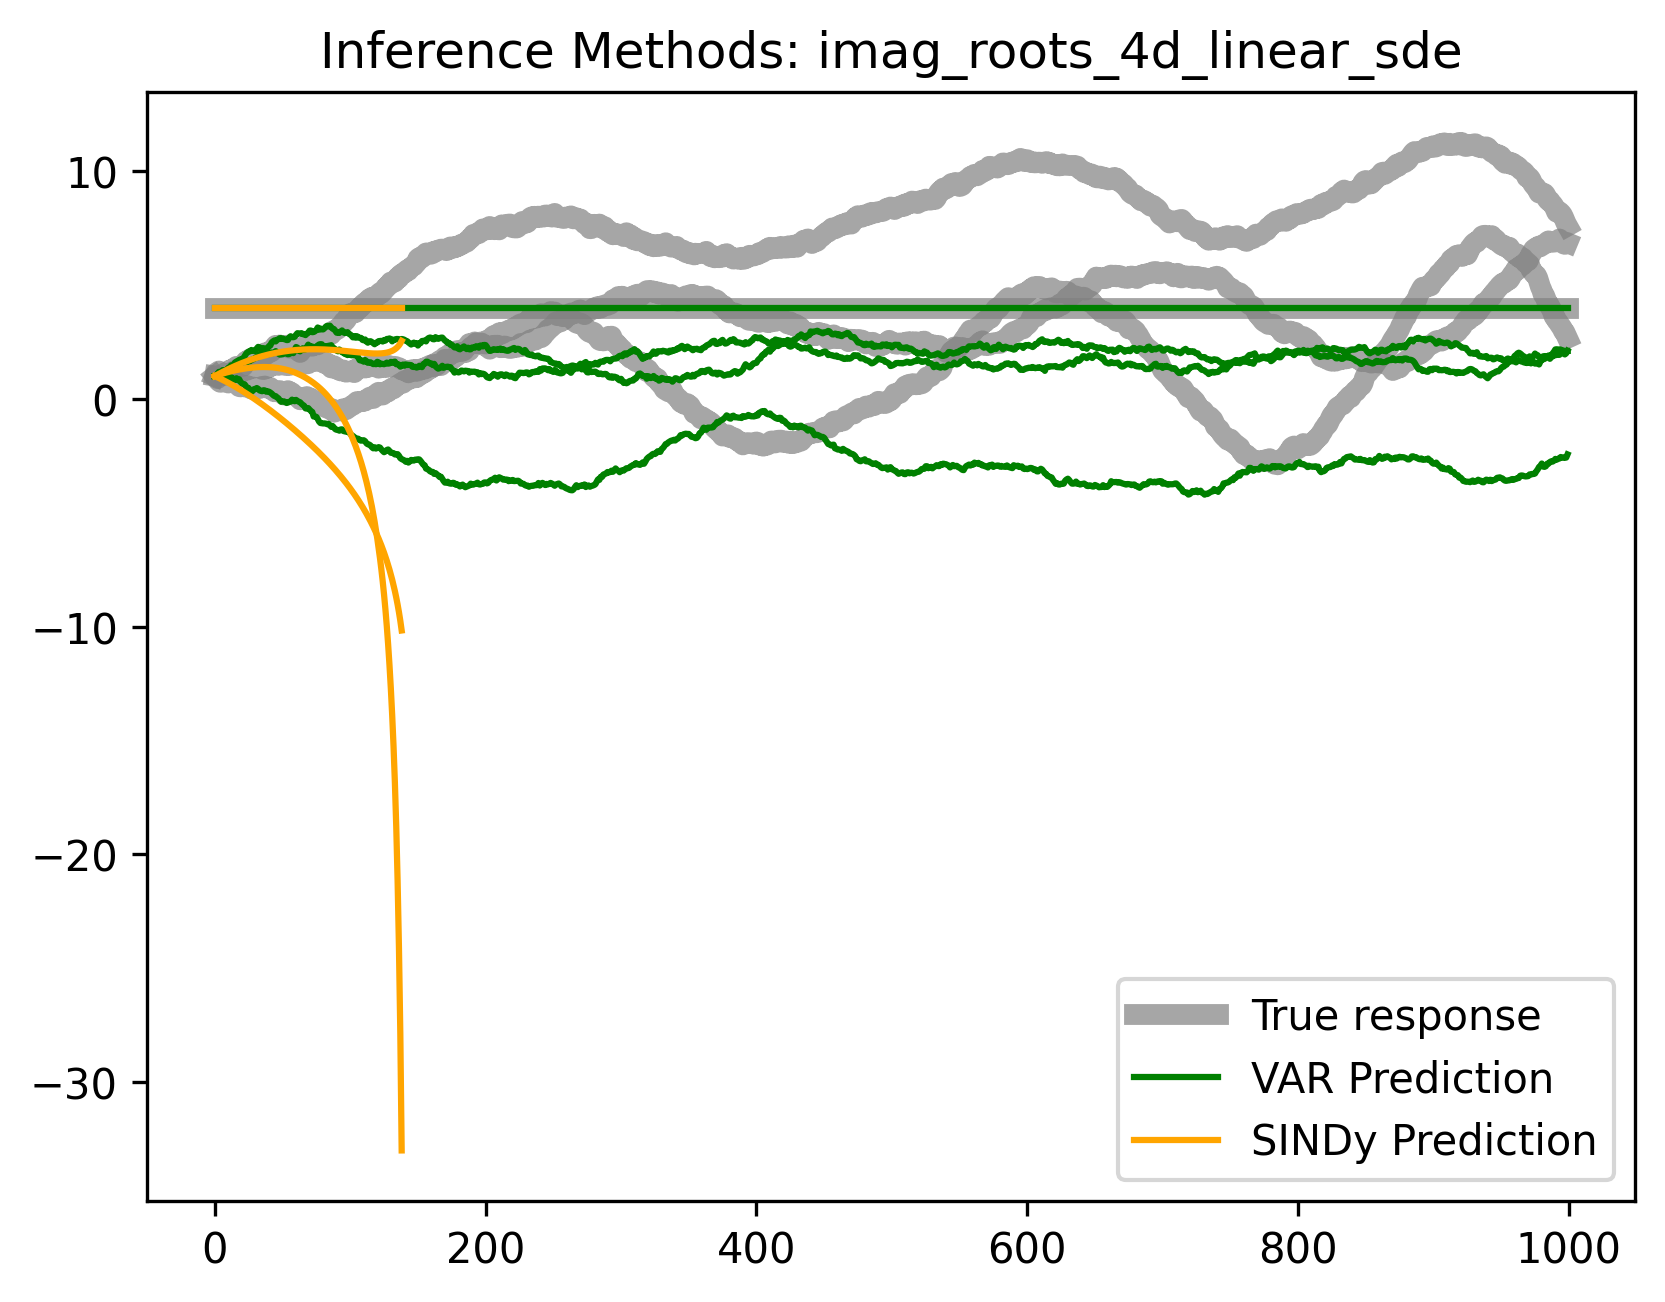

In [43]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

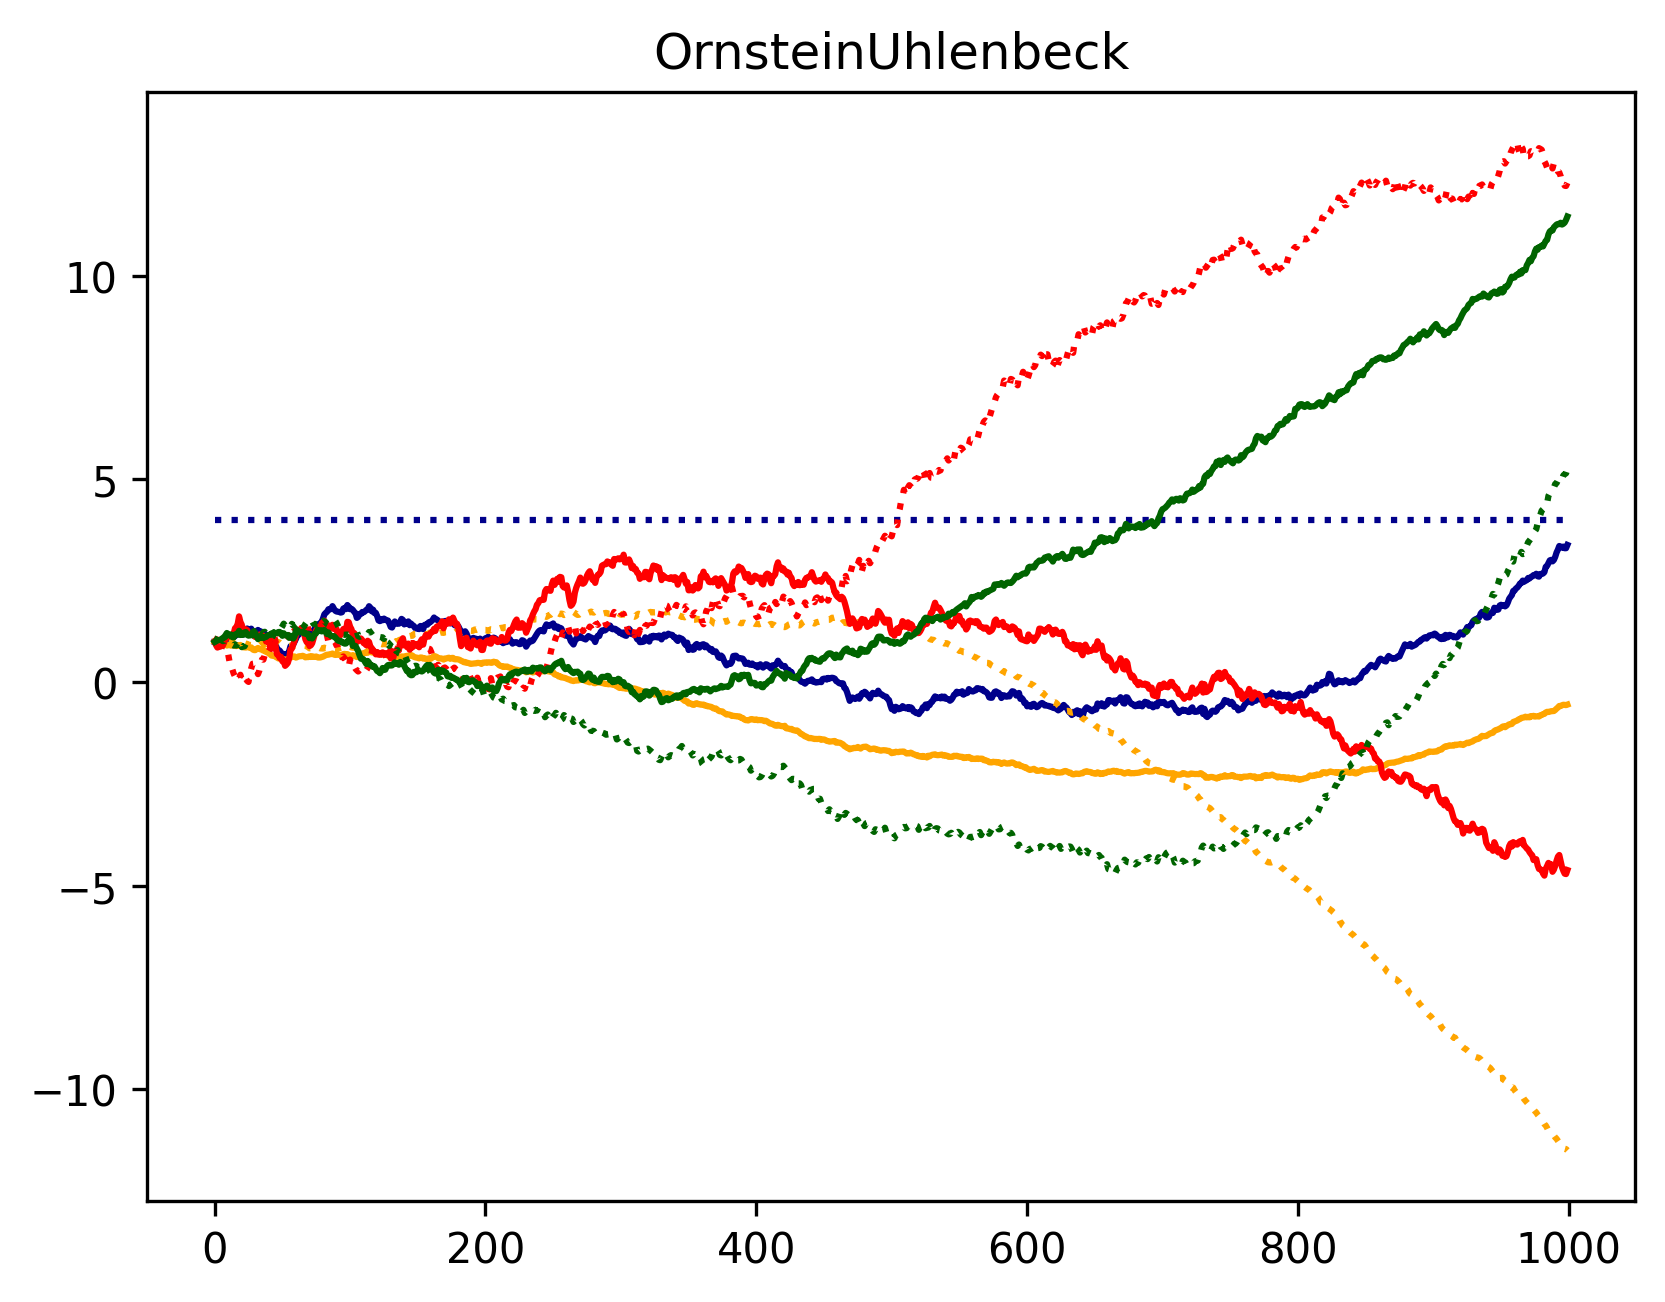

In [44]:
n = 4
theta = np.random.rand(n, n) - 0.5
Sigma = np.random.rand(n, n) - 0.5
mu = np.random.rand(n)


kwargs = dict(
    model_type=interfere.dynamics.OrnsteinUhlenbeck,
    model_params={"theta": theta, "mu": mu, "Sigma": Sigma},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[np.ones(4)],
    time_points_iter=[np.linspace(0, 10, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)

plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  0.0
SINDy accuracy:  0.3333333333333333


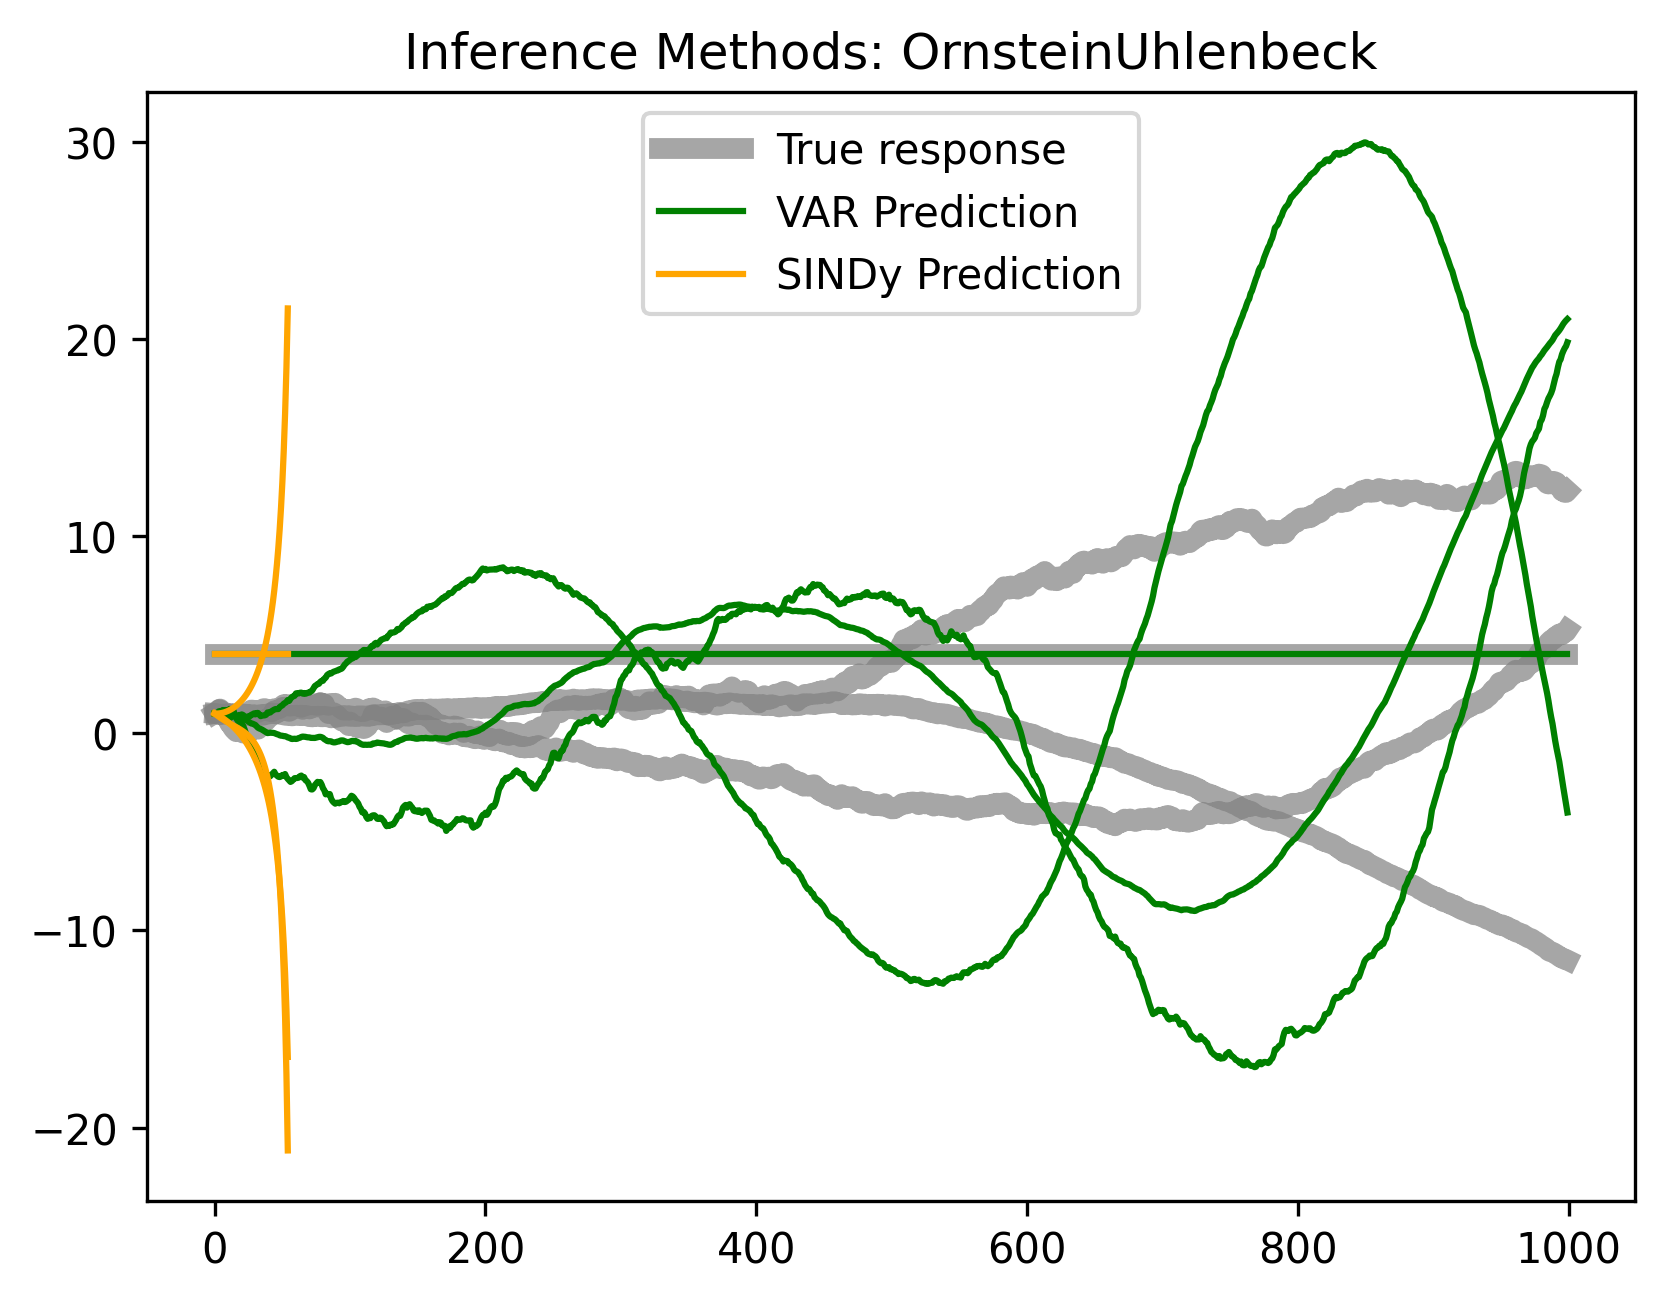

In [45]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

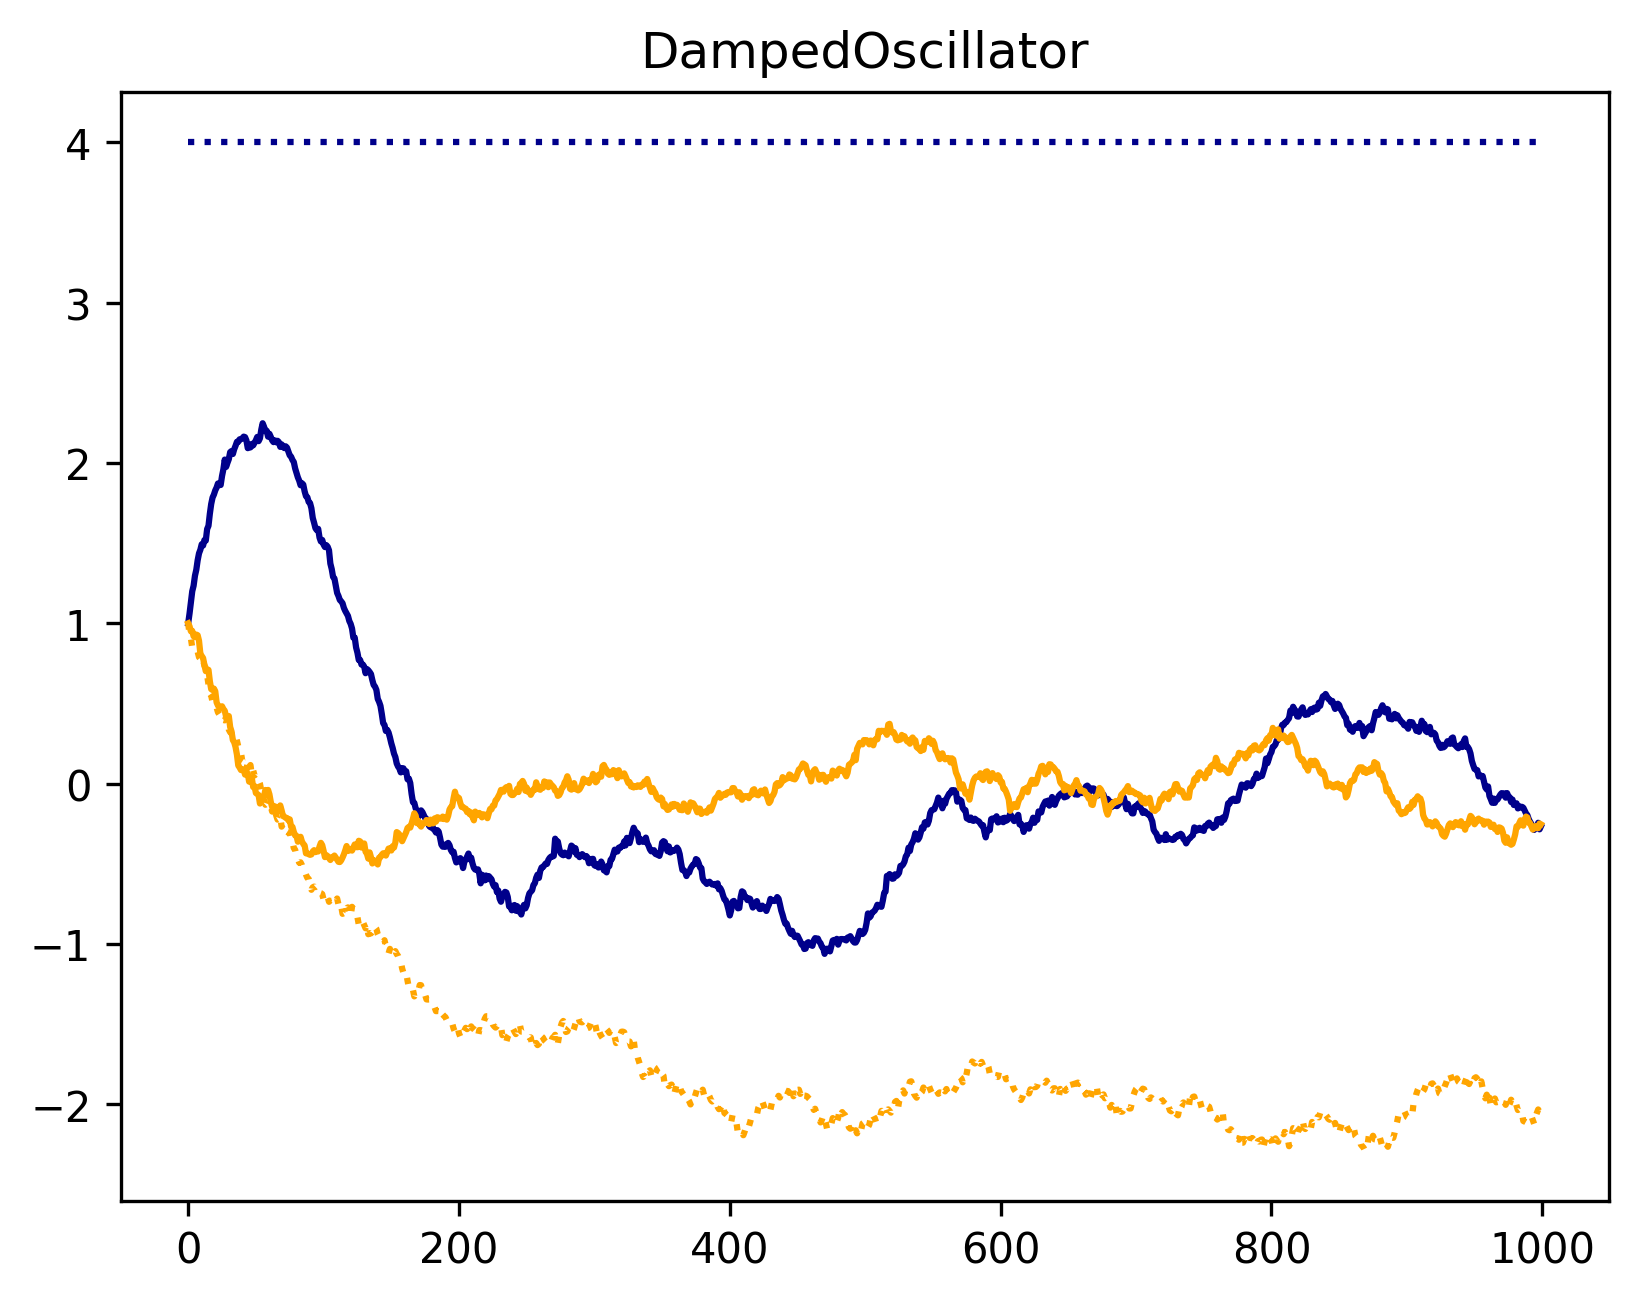

In [46]:
kwargs = dict(
    model_type=interfere.dynamics.DampedOscillator,
    model_params={"m": 10.0, "c": 2.0, "k": 1.0, "sigma": 0.1},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[np.ones(2)],
    time_points_iter=[np.linspace(0, 50, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  1.0
SINDy accuracy:  1.0


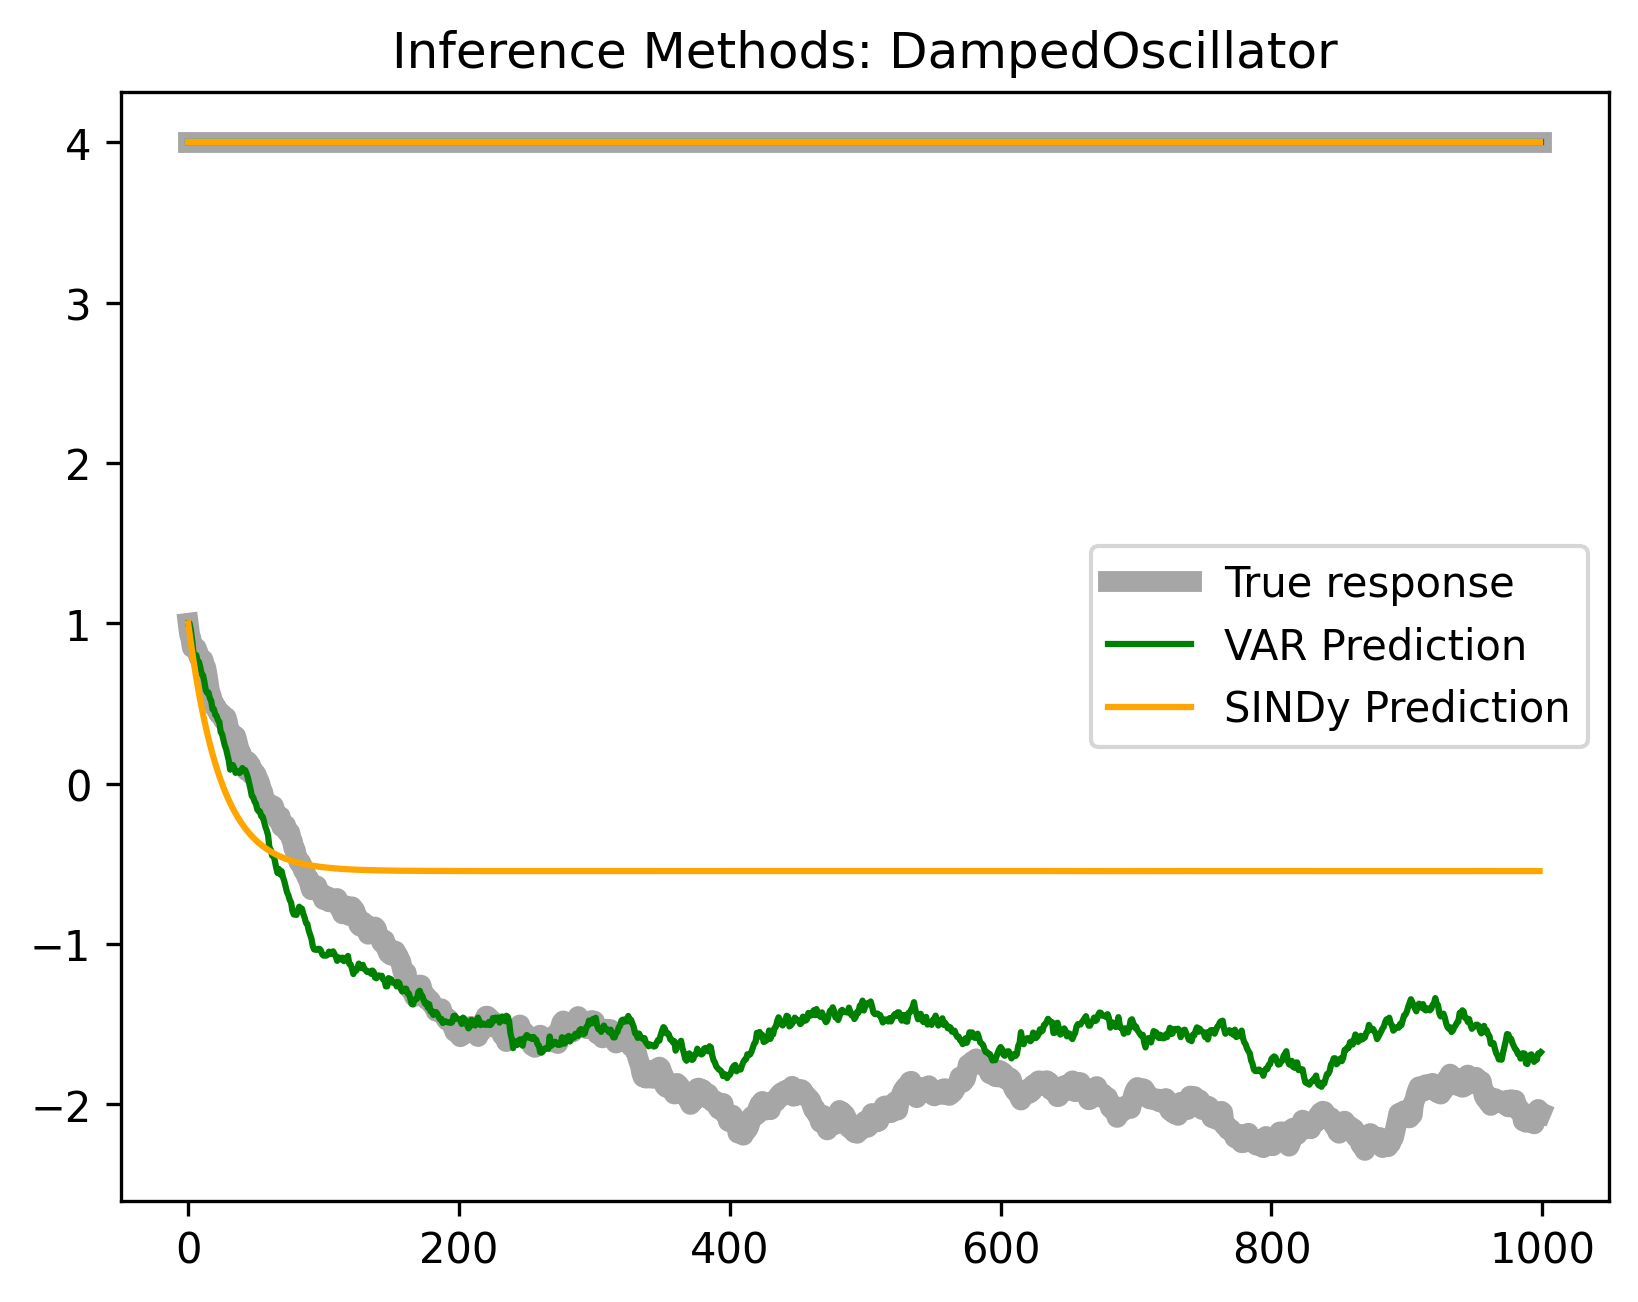

In [47]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

### Non-Linear

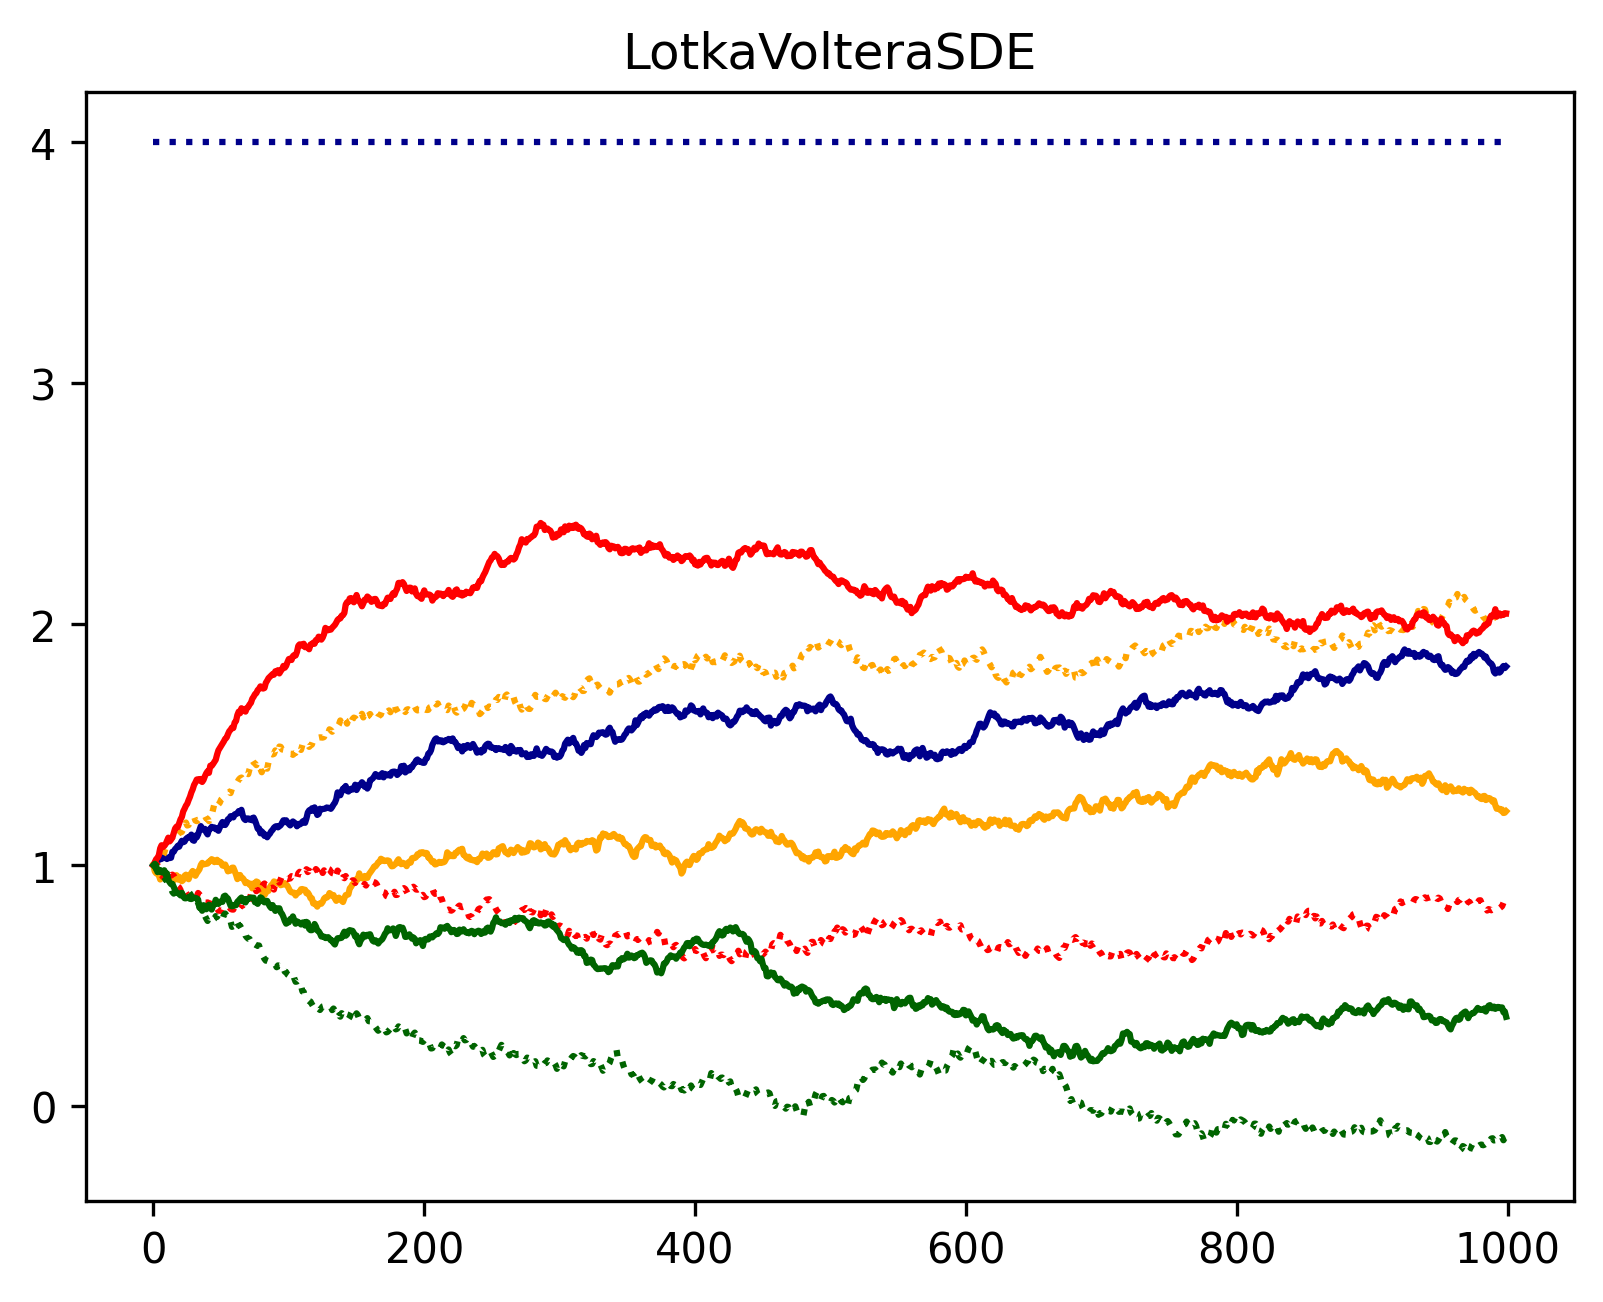

In [48]:
n = 4
r = np.ones(4)
k = np.ones(4)
A = np.random.rand(n, n) - 0.5

kwargs = dict(
    model_type=interfere.dynamics.LotkaVolteraSDE,
    model_params={"interaction_mat": A, "growth_rates": r, "capacities": k, "sigma": 0.1},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[np.ones(4)],
    time_points_iter=[np.linspace(0, 10, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  0.0
SINDy accuracy:  0.3333333333333333


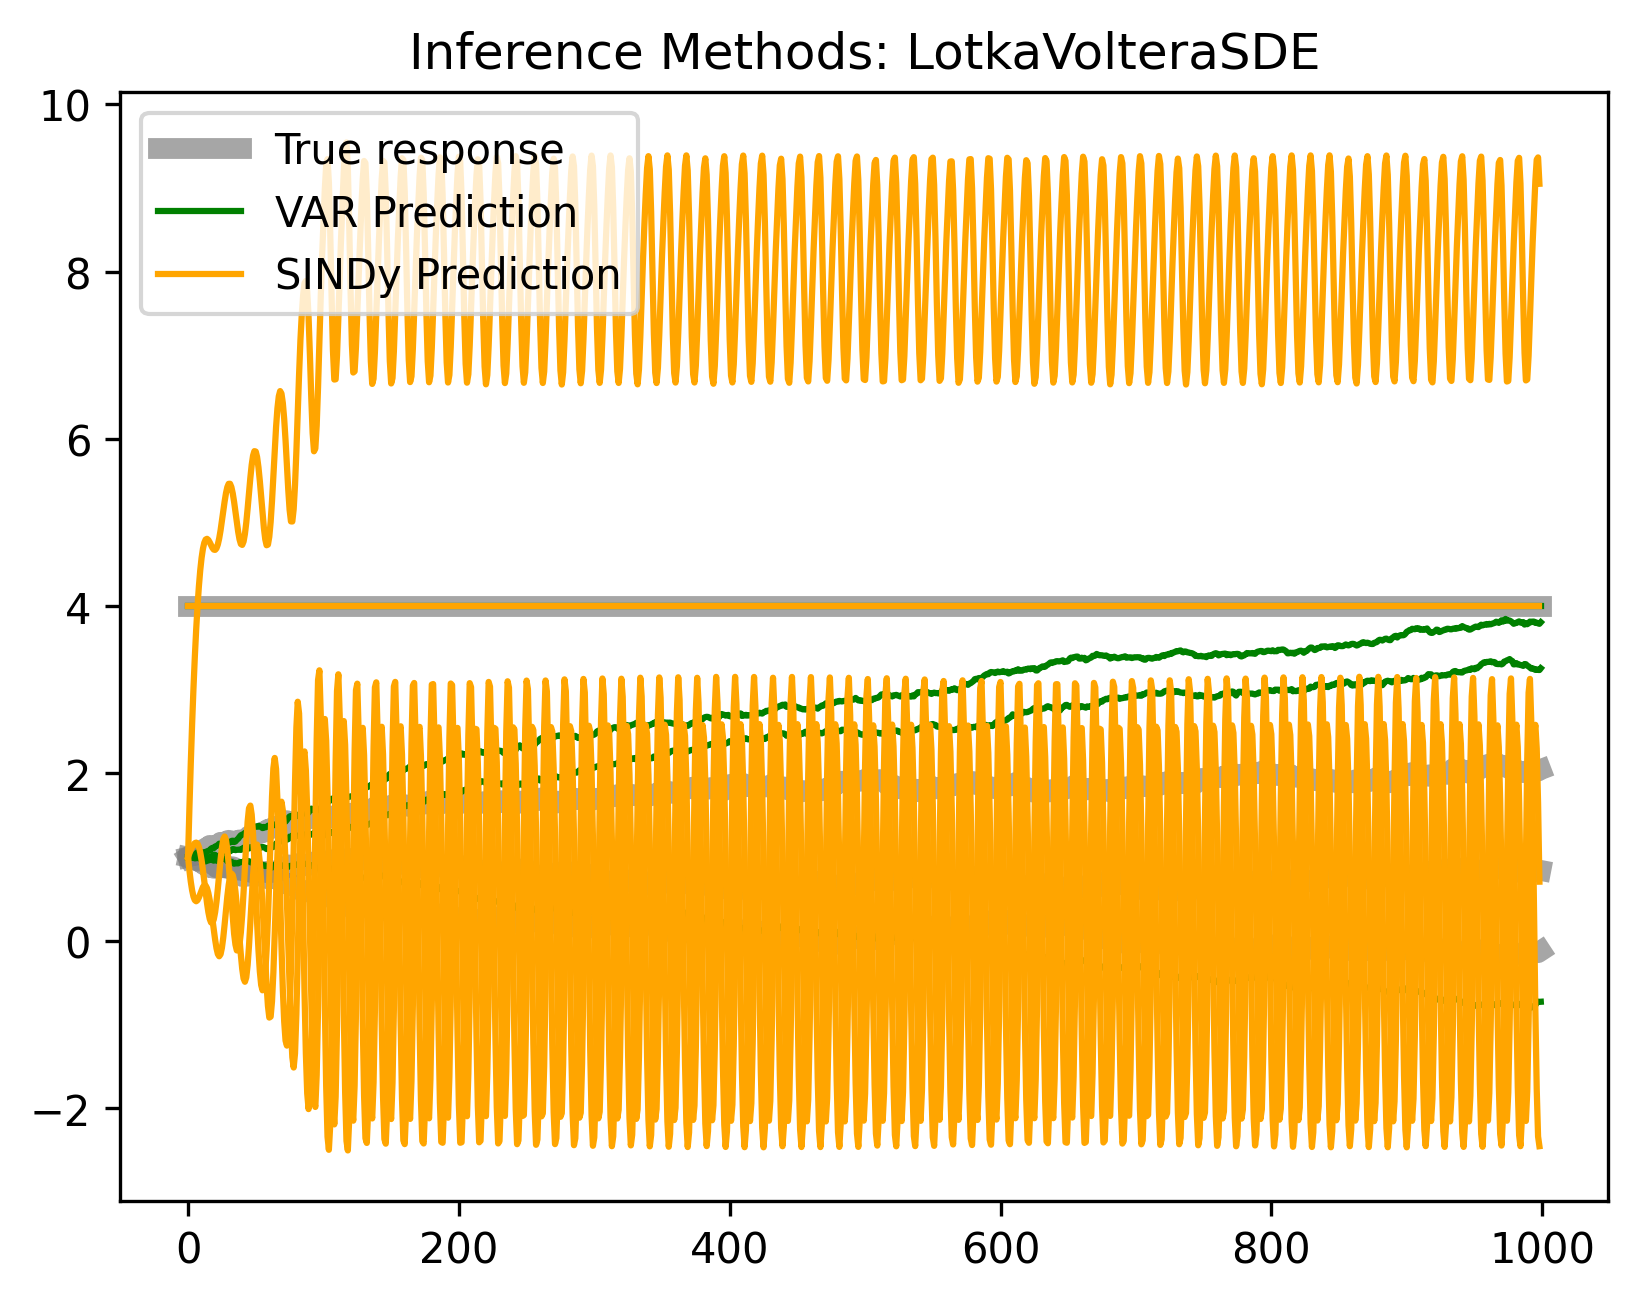

In [49]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

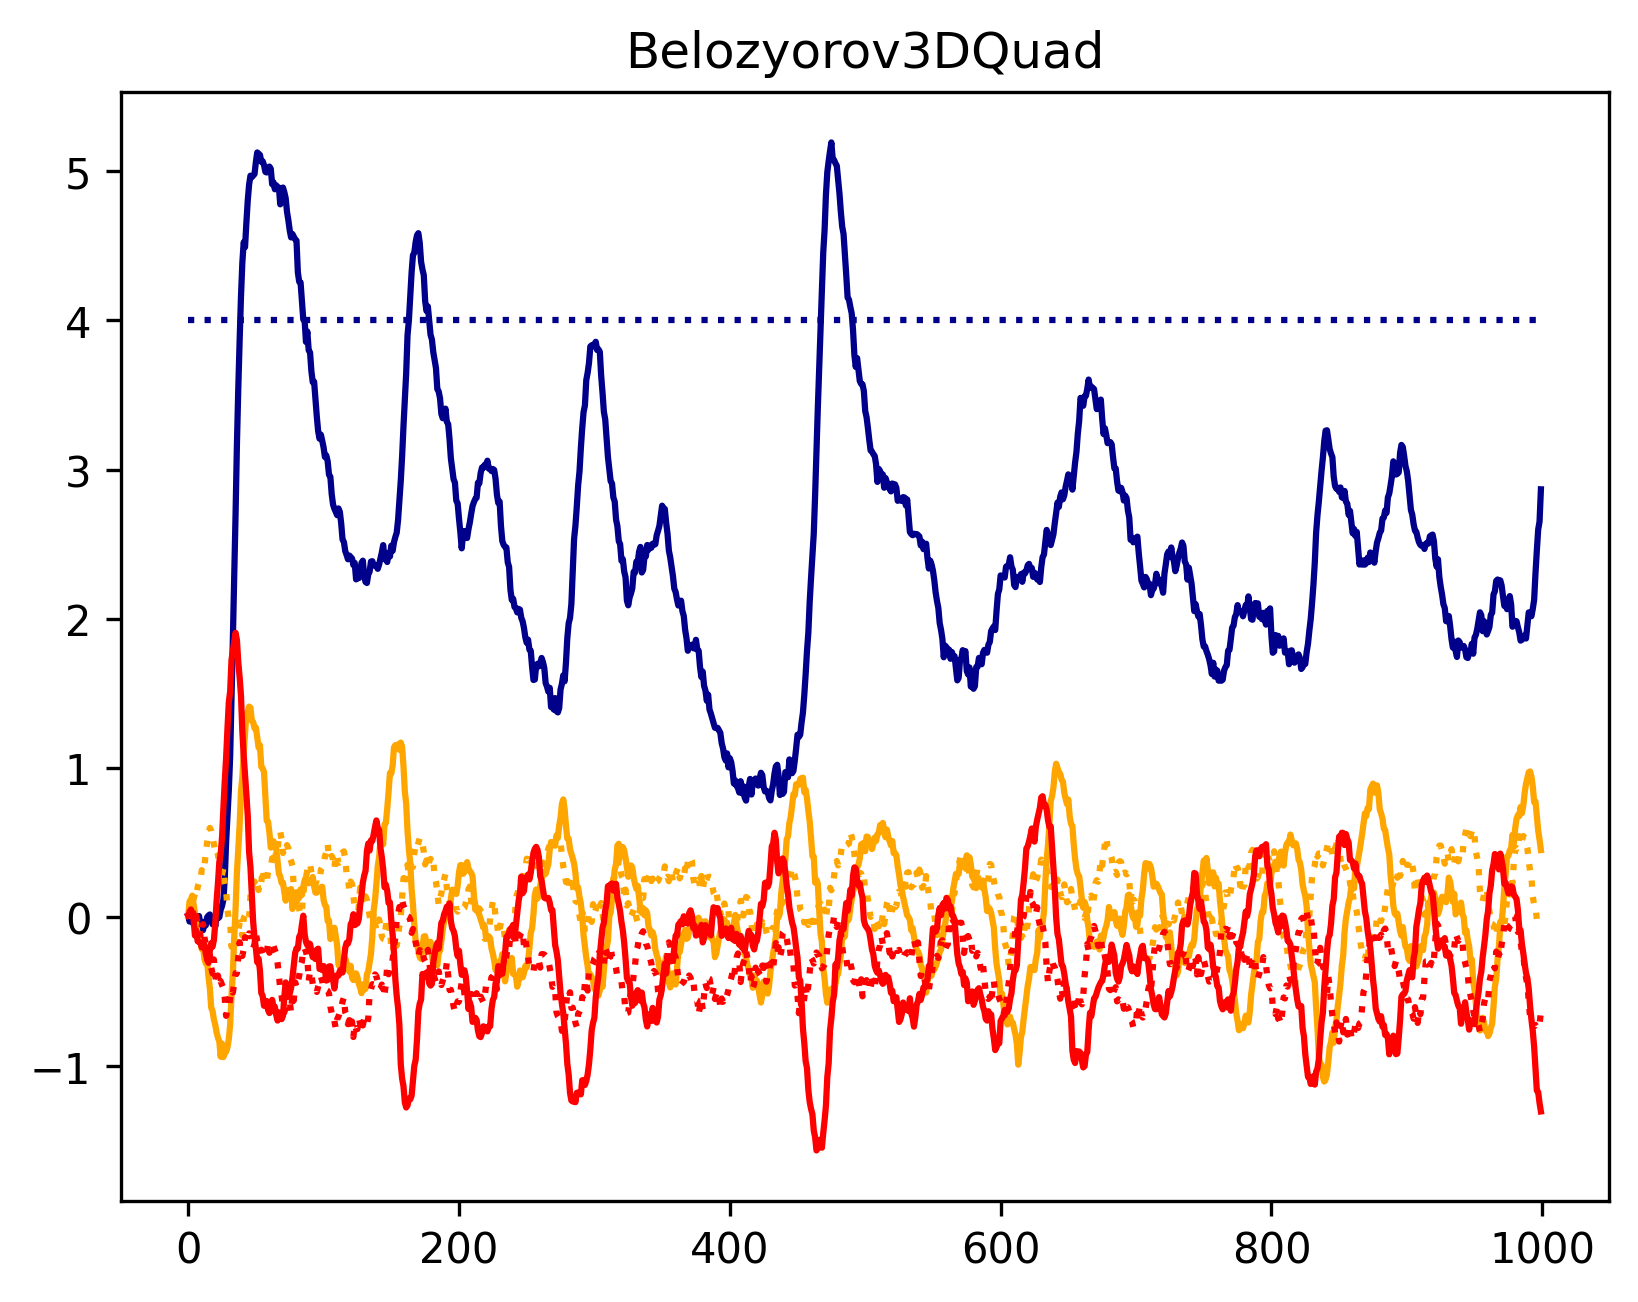

In [50]:
kwargs = dict(
    model_type=interfere.dynamics.Belozyorov3DQuad,
    model_params={"mu": 1.1, "sigma": 0.5},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 4.0},
    initial_condition_iter=[0.01 * np.ones(3)],
    time_points_iter=[np.linspace(0, 10, 1000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  1.0
SINDy accuracy:  1.0


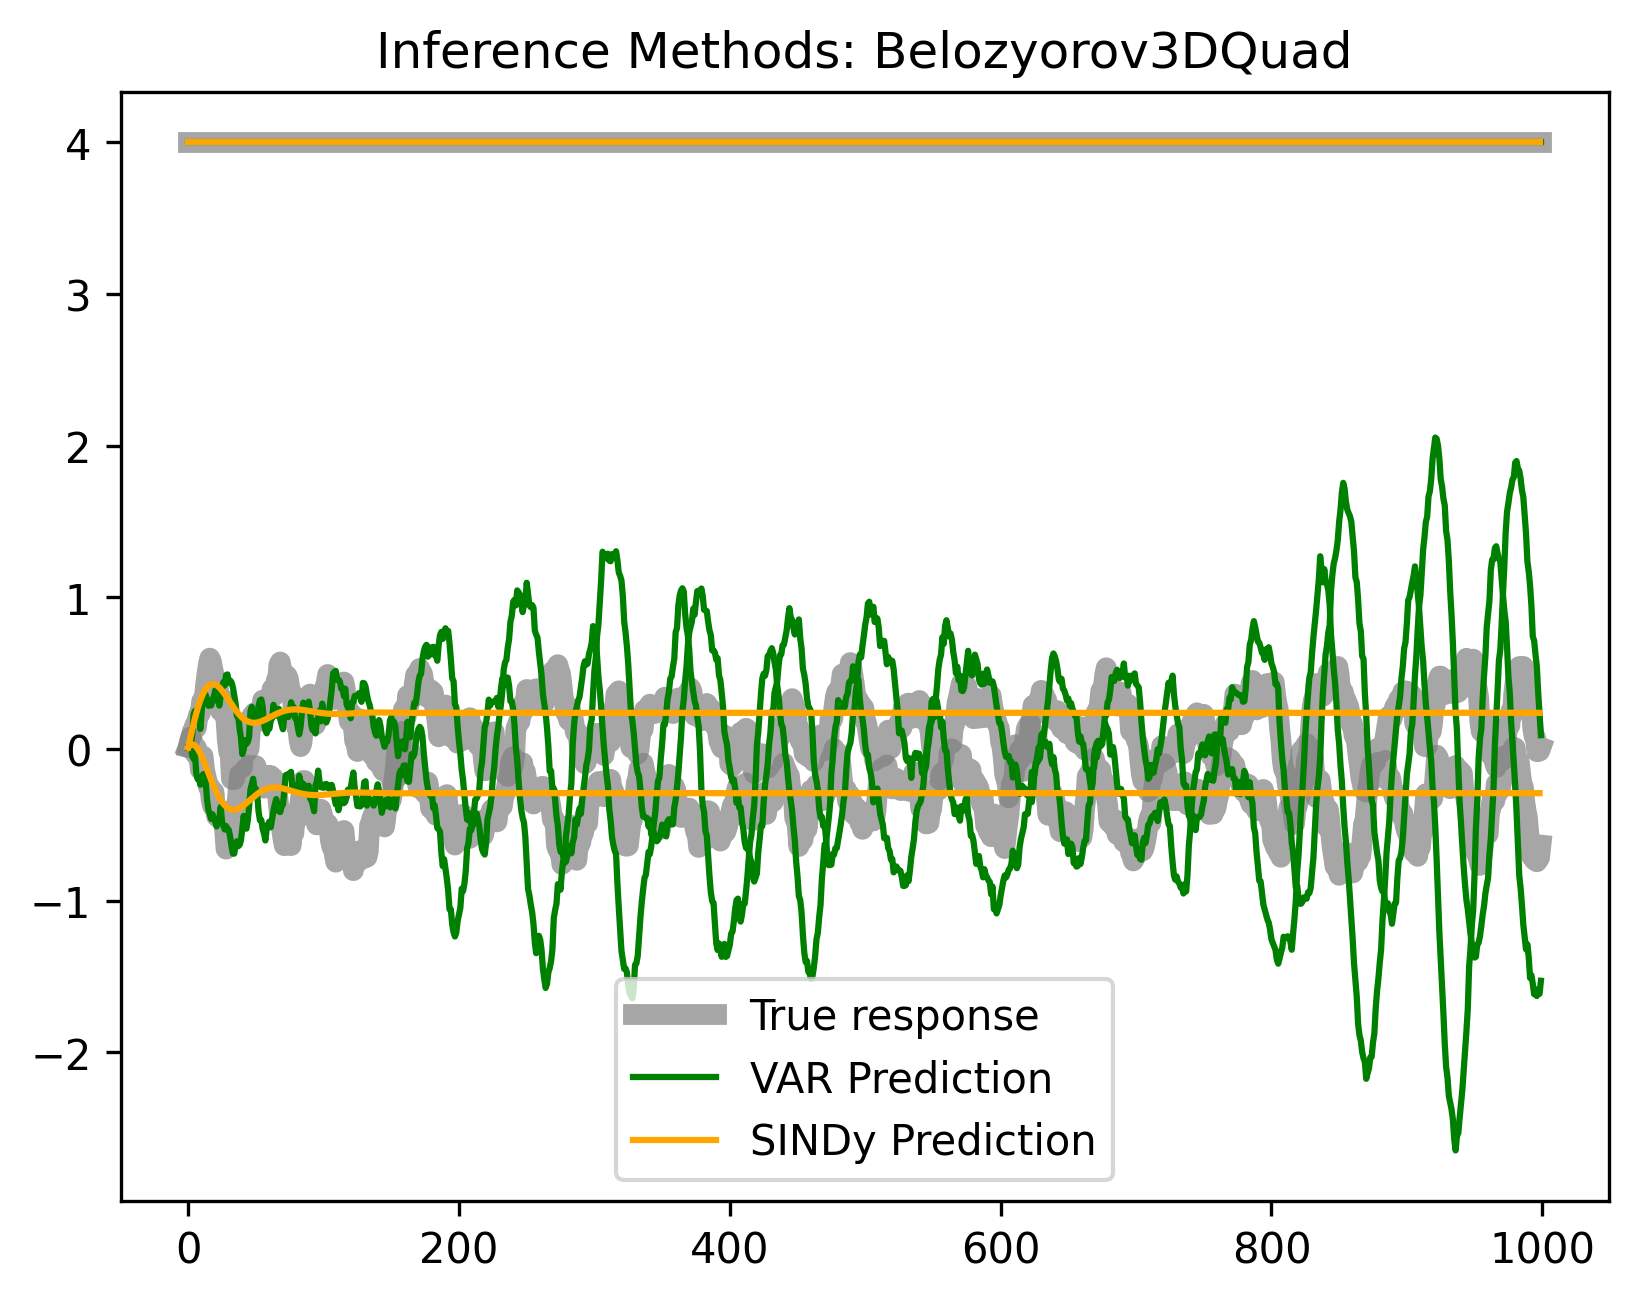

In [51]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()

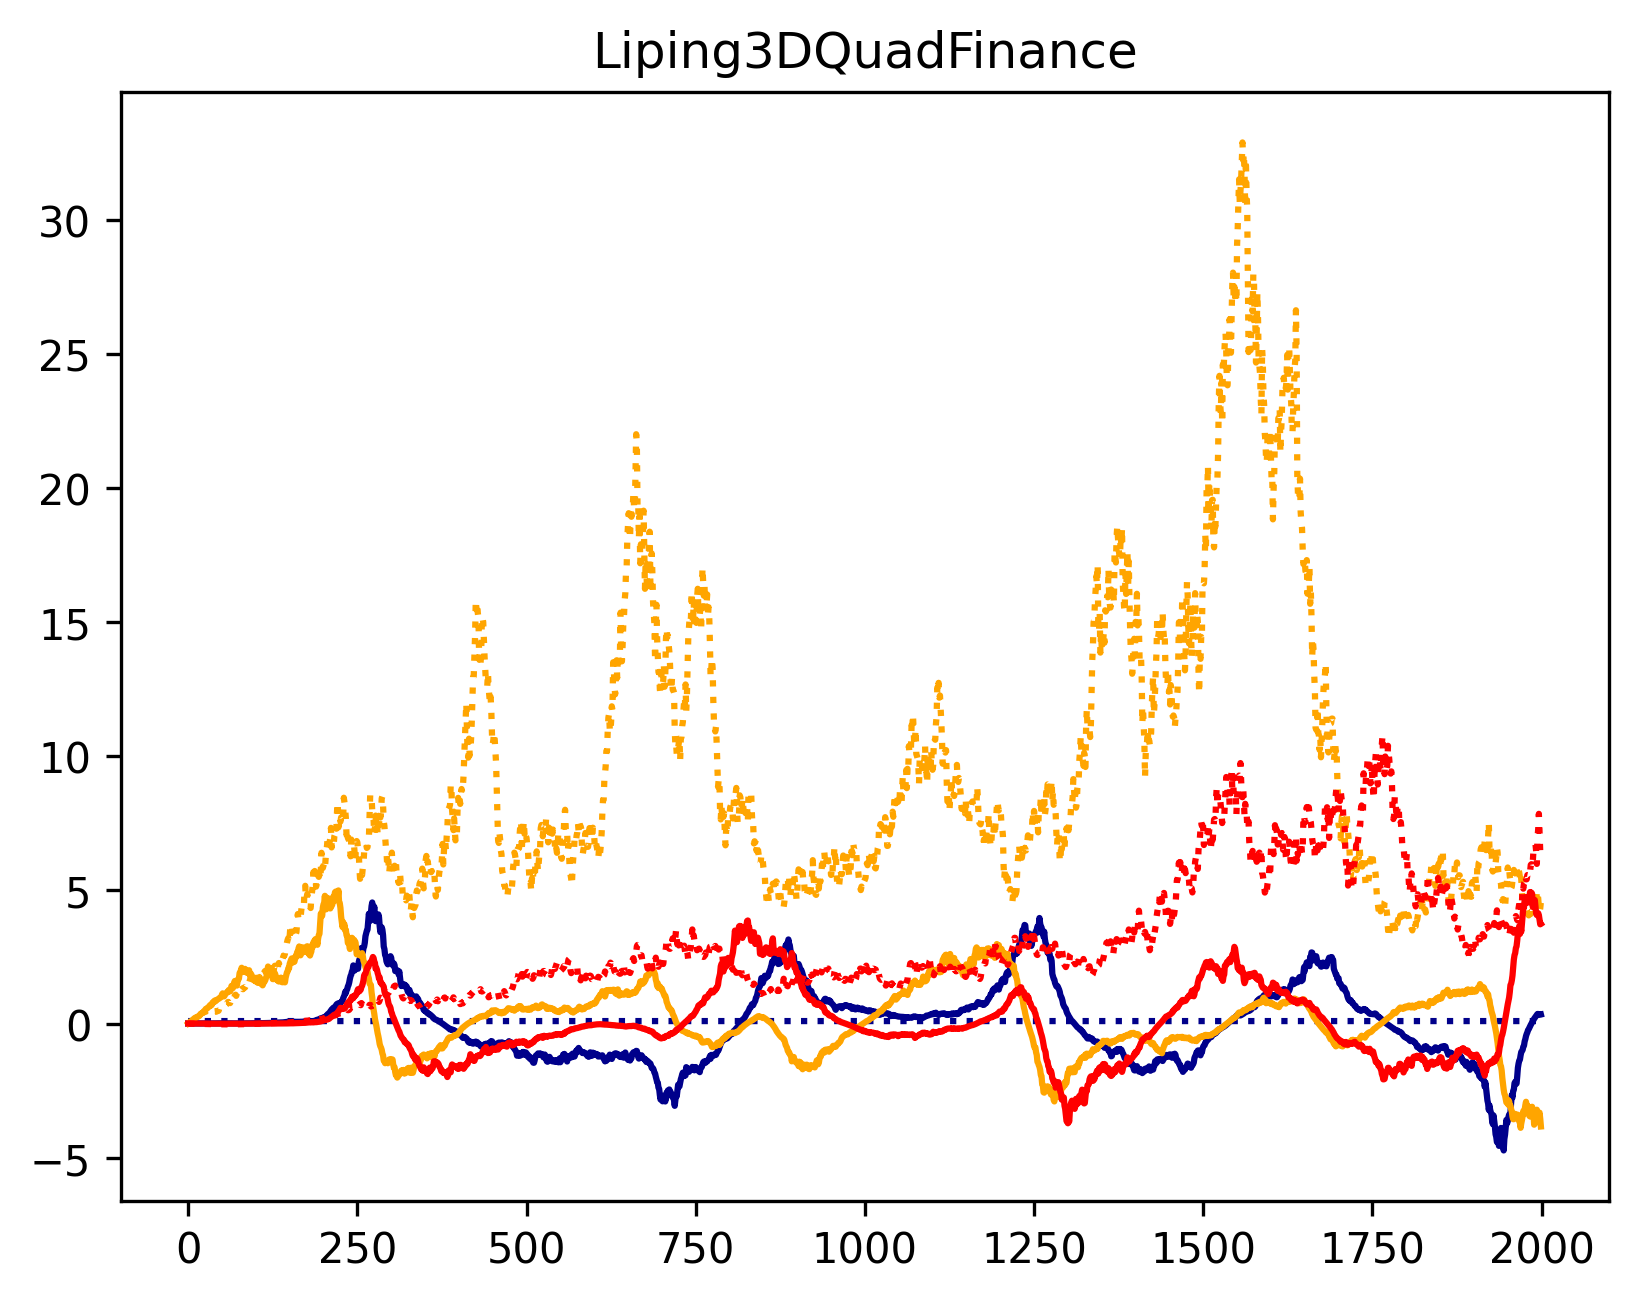

In [52]:
kwargs = dict(
    model_type=interfere.dynamics.Liping3DQuadFinance,
    model_params={"sigma": 0.5},
    intervention_type=interfere.perfect_intervention,
    intervention_params={"idxs": 0, "constants": 0.1},
    initial_condition_iter=[0.01 * np.ones(3)],
    time_points_iter=[np.linspace(0, 20, 2000)],
)

observations, counterfactuals = interfere.generate_counterfactual_dynamics(
    **kwargs, rng=rng
)

X, X_do = observations[0], counterfactuals[0]

for x, xdo, c in zip(X.T, X_do.T, COLORS):
    plt.plot(x, c=c)
    plt.plot(xdo, ":", c=c)
    
plt.title(kwargs["model_type"].__name__)
plt.show()



VAR accuracy:  0.0
SINDy accuracy:  1.0


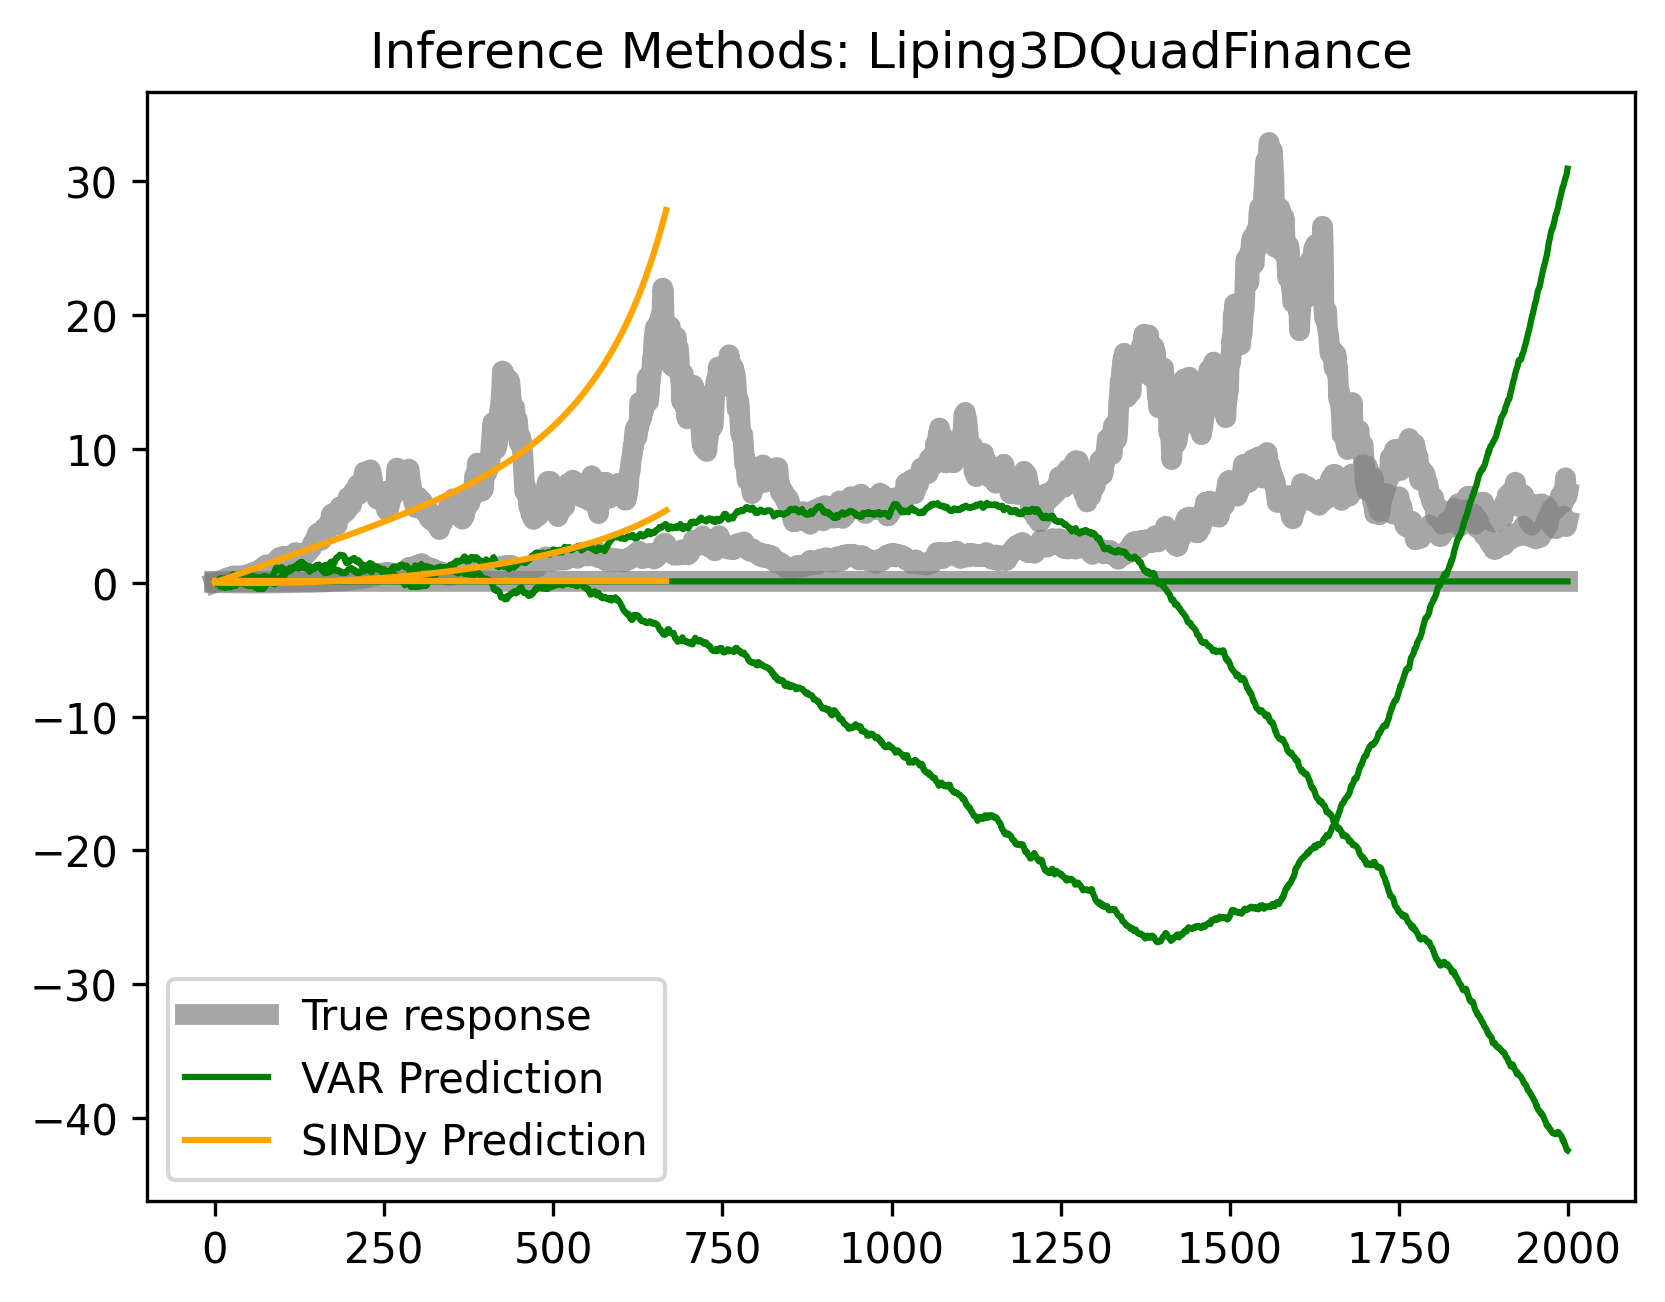

In [53]:
var_X_do = interfere.methods.var_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"]
)

sindy_X_do = interfere.methods.sindy_perf_interv_extrapolate(
    X,
    t=kwargs["time_points_iter"][0],
    intervention_idx=kwargs["intervention_params"]["idxs"],
    intervention_value=kwargs["intervention_params"]["constants"],
    max_sim_val=20.0  
)

print(
    "VAR accuracy: ",
    accuracy(X, X_do, var_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

print(
    "SINDy accuracy: ",
    accuracy(X, X_do, sindy_X_do,
             intervention_idx=kwargs["intervention_params"]["idxs"])
)

plt.plot(X_do, c="gray", alpha=0.7, lw=5)
plt.plot(var_X_do, c="green")
plt.plot(sindy_X_do, c="orange")

# Make labels
plt.plot(0, X_do[0, 0], c="gray", alpha=0.7, lw=5, label="True response")
plt.plot(0, var_X_do[0, 0], c="green", label="VAR Prediction")
plt.plot(0, sindy_X_do[0, 0], c="orange", label="SINDy Prediction")

plt.title("Inference Methods: " + str(kwargs["model_type"].__name__))
plt.legend()
plt.show()